In [ ]:

# Reading the cleaned numeric abolone data set
import pandas as pd
import numpy as np
 
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)
 

from google.colab import files
uploaded = files.upload()
import io
 
aboloneAgeDataNumeric = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))
aboloneAgeDataNumeric.head()



Saving abalone.csv to abalone.csv


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.5,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.5,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.5,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Rings']
Predictors=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight','Shucked weight','Viscera weight', 'Shell weight']

X=aboloneAgeDataNumeric[Predictors].values
y=aboloneAgeDataNumeric[TargetVariable].values

from sklearn.preprocessing import MinMaxScaler

### Normalization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=MinMaxScaler()
TargetVarScaler=MinMaxScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Set the random seed
np.random.seed(123)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3341, 8)
(3341, 1)
(836, 8)
(836, 1)


In [ ]:
# Installing required libraries
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=8, input_dim=8, kernel_initializer='normal', activation='relu'))

# Defining the first hidden layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

# Defining the second hidden layer of the model
model.add(Dense(units=1, kernel_initializer='normal', activation='relu'))

# Defining the Third hidden layer of the model
model.add(Dense(units=7, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 50, epochs = 500, verbose=1)

Epoch 1/500
67/67 [==============================] - 1s 1ms/step - loss: 0.0915
Epoch 2/500
67/67 [==============================] - 0s 1ms/step - loss: 0.0363
Epoch 3/500
67/67 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 4/500
67/67 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 5/500
67/67 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 6/500
67/67 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 7/500
67/67 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 8/500
67/67 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 9/500
67/67 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 10/500
67/67 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 11/500
67/67 [==============================] - 0s 4ms/step - loss: 0.0087
Epoch 12/500
67/67 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 13/500
67/67 [=================

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

def FunctionFindBestParams(X_train, y_train, X_val, y_val, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15]
    epoch_list  =   [100, 200, 300, 400, 500]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=8, input_dim=8, kernel_initializer='normal', activation='relu'))

            # Defining the First hidden layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # Defining the second hidden layer of the model
            model.add(Dense(units=1, kernel_initializer='normal'))

            # Defining the Third hidden layer of the model
            model.add(Dense(units=7, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Define early stopping criteria
            early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

            # Fitting the ANN to the Training set and validating on the validation set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0, 
                      validation_data=(X_val, y_val), callbacks=[early_stop])

            # Evaluate the model on the test set and calculate accuracy
            MAPE = model.evaluate(X_test, y_test, verbose=0)
            accuracy = (1 - MAPE) * 100
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', accuracy)
            
            SearchResultsData = pd.concat([SearchResultsData, pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), accuracy]], 
                                              columns=['TrialNumber', 'Parameters', 'Accuracy'])], 
                             ignore_index=True)
            
    return(SearchResultsData)

# Split data into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=1)

# Calling the function
ResultsData = FunctionFindBestParams(X_train, y_train, X_val, y_val, X_test, y_test)




Epoch 80: early stopping
1 Parameters: batch_size: 5 - epochs: 100 Accuracy: 99.39695596694946
Epoch 65: early stopping
2 Parameters: batch_size: 5 - epochs: 200 Accuracy: 99.40503286197782
Epoch 35: early stopping
3 Parameters: batch_size: 5 - epochs: 300 Accuracy: 99.33063173666596
Epoch 86: early stopping
4 Parameters: batch_size: 5 - epochs: 400 Accuracy: 99.4195593520999
Epoch 80: early stopping
5 Parameters: batch_size: 5 - epochs: 500 Accuracy: 99.4110784959048
Epoch 84: early stopping
6 Parameters: batch_size: 10 - epochs: 100 Accuracy: 99.39811881631613
Epoch 114: early stopping
7 Parameters: batch_size: 10 - epochs: 200 Accuracy: 99.3758188560605
Epoch 83: early stopping
8 Parameters: batch_size: 10 - epochs: 300 Accuracy: 99.40854744054377
Epoch 84: early stopping
9 Parameters: batch_size: 10 - epochs: 400 Accuracy: 99.40537321381271
Epoch 166: early stopping
10 Parameters: batch_size: 10 - epochs: 500 Accuracy: 99.42014245316386
Epoch 13: early stopping
11 Parameters: batch

<Axes: xlabel='Parameters'>

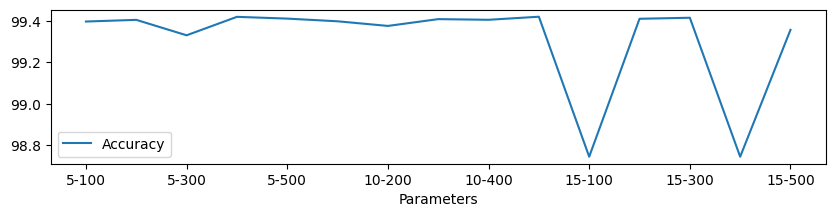

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(10,2), kind='line')

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 5, epochs = 400, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted rings data back to original rings scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original rings scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)



14/14 [==============================] - 0s 1ms/step


In [ ]:
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Rings']=y_test_orig

Test_Data_round=np.round(Predictions)
TestingData['PredictedRings']=Test_Data_round

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,PredictedRings
0,0.5,0.630,0.515,0.175,1.1955,0.4920,0.2470,0.3700,11.0,13.0
1,0.0,0.620,0.485,0.220,1.5110,0.5095,0.2840,0.5100,17.0,17.0
2,1.0,0.625,0.485,0.160,1.1500,0.5255,0.2570,0.3315,11.0,12.0
3,0.0,0.530,0.400,0.165,0.7720,0.2855,0.1975,0.2300,12.0,13.0
4,0.5,0.645,0.490,0.160,1.2510,0.5355,0.3345,0.3165,9.0,11.0


In [ ]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Rings']-TestingData['PredictedRings'])/TestingData['Rings'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 82.62514451168036


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,PredictedRings,APE
0,0.5,0.630,0.515,0.175,1.1955,0.4920,0.2470,0.3700,11.0,13.0,18.181818
1,0.0,0.620,0.485,0.220,1.5110,0.5095,0.2840,0.5100,17.0,17.0,0.000000
2,1.0,0.625,0.485,0.160,1.1500,0.5255,0.2570,0.3315,11.0,12.0,9.090909
3,0.0,0.530,0.400,0.165,0.7720,0.2855,0.1975,0.2300,12.0,13.0,8.333333
4,0.5,0.645,0.490,0.160,1.2510,0.5355,0.3345,0.3165,9.0,11.0,22.222222


In [ ]:
from sklearn.metrics import mean_squared_error

# Compute the MSE for training data
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Compute the MSE for testing data
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", np.sqrt(train_mse))
print("Testing RMSE:", np.sqrt(test_mse))


14/14 [==============================] - 0s 1ms/step
Training RMSE: 0.07603964895238446
Testing RMSE: 0.07824938793527764
